In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = '/content/drive/MyDrive/Data Science Projects/Password Strength/data.csv'

In [ ]:
df = pd.read_csv(path, error_bad_lines= False)
df

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


In [ ]:
df['strength'].unique()

array([1, 2, 0])

In [ ]:
df.isna().sum()

password    1
strength    0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=(6,5))

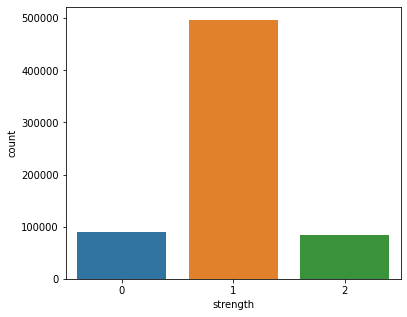

In [ ]:
sns.countplot(x=df['strength'])
plt.show()

In [ ]:
password_tuple = np.array(df)
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [ ]:
import random 
random.shuffle(password_tuple)

In [ ]:
x = [labels [0] for labels in password_tuple]
y = [labels [1] for labels in password_tuple]

In [ ]:
def word_character(inputs):
  characters = []
  for i in inputs:
    characters.append(i)
  return characters

In [ ]:
word_character('184520socram')

['1', '8', '4', '5', '2', '0', 's', 'o', 'c', 'r', 'a', 'm']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer = word_character)

In [ ]:
X = tfidf_vectorizer.fit_transform(x)

In [ ]:
X.shape

(669639, 124)

In [ ]:
tfidf_vectorizer.get_feature_names_out()

array(['\x05', '\x08', '\x0f', '\x10', '\x11', '\x12', '\x16', '\x17',
       '\x19', '\x1b', '\x1c', '\x1e', ' ', '!', '"', '#', '$', '%', '&',
       '(', ')', '*', '+', '-', '.', '/', '0', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', ';', '<', '=', '>', '?', '@', '[', '\\', ']',
       '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
       'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w',
       'x', 'y', 'z', '{', '|', '}', '~', '\x7f', '\xa0', '¡', '¤', '¦',
       '¨', '«', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¹', 'º', '¾',
       '¿', 'ß', 'à', 'á', 'â', 'ä', 'å', 'æ', 'ç', 'è', 'ê', 'í', 'ï',
       'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', '÷', 'ú', 'û', 'ü', 'ý', 'þ',
       'ÿ', '‚'], dtype=object)

In [ ]:
first_document_vector = X[0]
first_document_vector

<1x124 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [ ]:
first_document_vector.T.todense()

In [ ]:
df = pd.DataFrame(first_document_vector.T.todense(), index=tfidf_vectorizer.get_feature_names_out(), columns=['TF-IDF'])
df.sort_values(by=['TF-IDF'], ascending=False)

,TF-IDF
7,0.591501
5,0.566890
z,0.335879
k,0.292020
d,0.285746
...,...
<,0.000000
;,0.000000
9,0.000000
8,0.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
X_train.shape

(468747, 124)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_regression = LogisticRegression(random_state=0, multi_class = 'multinomial')

In [ ]:
log_regression.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [ ]:
review = np.array(['hello123'])
predict = tfidf_vectorizer.transform(review)
log_regression.predict(predict)

array([1])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [ ]:
y_pred = log_regression.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(accuracy_score(y_test, y_pred))

[[  7984  18938     25]
 [  5616 139484   3939]
 [    72   7692  17142]]
0.81939549608745


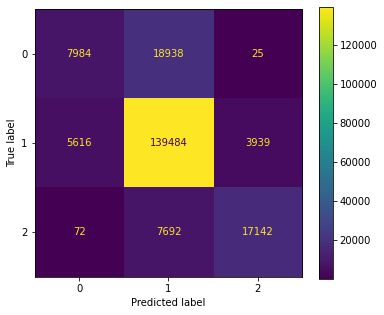

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.30      0.39     26947
           1       0.84      0.94      0.89    149039
           2       0.81      0.69      0.75     24906

    accuracy                           0.82    200892
   macro avg       0.75      0.64      0.67    200892
weighted avg       0.80      0.82      0.80    200892

